# Clasificación
### En esta notebook realizamos la clasificación de los géneros a partir de los siguientes datos extraídos:
#### - Features obtenidos del topic modeling de LDA. Utilizamos el array de la composición de todos los tópicos para cada canción.
#### - Features obtenidos por análisis de sentimiento. Al igual que con los tópicos, utilizamos todo el array y no el sentimiento preponderante.

#### Los modelos probados para la clasificación son: Random Forest, ExtraTress, Bagging, Logistic Regression y Catboost.
#### Realizamos la prueba de clasificación de todos los géneros disponibles y también probamos dejar de lado Rock y Pop. Estos dos géneros contienen una gran cantidad de muestras y aplican a un espectro musical muy amplio.
#### Utilizamos los métodos de reducción de dimensionalidad, SMOTE y balanceo de clase utilizando el class_weight de SKlearn.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

/opt/conda/envs/geopandas/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [6]:
df = pd.read_csv("clasificar.csv")

In [7]:
df_amaru = pd.read_csv("Only_English_Sentiments_All.csv")
df_amaru

,Unnamed: 0,index,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,0,0,0.027624,0.011050,0.033149,0.016575,0.071823,0.077348,0.116022,0.060773,0.022099,0.049724
1,1,1,0.037037,0.055556,0.018519,0.018519,0.027778,0.074074,0.037037,0.037037,0.037037,0.018519
2,2,2,0.013889,0.069444,0.013889,0.027778,0.097222,0.055556,0.208333,0.041667,0.000000,0.152778
3,3,3,0.000000,0.042056,0.000000,0.060748,0.168224,0.070093,0.378505,0.065421,0.046729,0.070093
4,4,4,0.000000,0.025157,0.000000,0.000000,0.050314,0.100629,0.150943,0.100629,0.000000,0.000000
5,5,5,0.053571,0.053571,0.017857,0.035714,0.107143,0.178571,0.142857,0.178571,0.017857,0.071429
6,6,6,0.008403,0.126050,0.008403,0.000000,0.117647,0.033613,0.168067,0.000000,0.008403,0.084034
7,7,7,0.000000,0.086022,0.000000,0.010753,0.043011,0.059140,0.043011,0.016129,0.037634,0.043011
8,8,8,0.004202,0.042017,0.008403,0.037815,0.147059,0.050420,0.180672,0.037815,0.025210,0.033613
9,9,9,0.059211,0.026316,0.052632,0.013158,0.164474,0.065789,0.184211,0.019737,0.019737,0.039474


In [8]:
df.columns

Index(['Unnamed: 0', 'level_0', 'Unnamed: 0.1', 'index', 'song', 'year',
       'artist', 'genre', 'lyrics', 'word_count', 'cero', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39'],
      dtype='object')

In [9]:
df.set_index(["index"],inplace = True)

In [10]:
df_amaru.set_index(["index"],inplace = True)


In [11]:
df_amaru

,Unnamed: 0,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
index,,,,,,,,,,,
0,0,0.027624,0.011050,0.033149,0.016575,0.071823,0.077348,0.116022,0.060773,0.022099,0.049724
1,1,0.037037,0.055556,0.018519,0.018519,0.027778,0.074074,0.037037,0.037037,0.037037,0.018519
2,2,0.013889,0.069444,0.013889,0.027778,0.097222,0.055556,0.208333,0.041667,0.000000,0.152778
3,3,0.000000,0.042056,0.000000,0.060748,0.168224,0.070093,0.378505,0.065421,0.046729,0.070093
4,4,0.000000,0.025157,0.000000,0.000000,0.050314,0.100629,0.150943,0.100629,0.000000,0.000000
5,5,0.053571,0.053571,0.017857,0.035714,0.107143,0.178571,0.142857,0.178571,0.017857,0.071429
6,6,0.008403,0.126050,0.008403,0.000000,0.117647,0.033613,0.168067,0.000000,0.008403,0.084034
7,7,0.000000,0.086022,0.000000,0.010753,0.043011,0.059140,0.043011,0.016129,0.037634,0.043011
8,8,0.004202,0.042017,0.008403,0.037815,0.147059,0.050420,0.180672,0.037815,0.025210,0.033613


In [12]:
df_amaru.drop(columns = ["Unnamed: 0"],inplace = True)

In [13]:
df = pd.concat((df,df_amaru),axis = 1).dropna()

In [14]:
df.dropna(inplace = True)
df.shape

(210785, 59)

In [15]:
df.groupby("genre").describe()

Unnamed: 0                                                          \
                count           mean           std    min       25%       50%   
genre                                                                           
Country       14147.0   98696.313565  60148.098243  346.0  43820.50   88599.0   
Electronic     6535.0  101400.734353  62096.302042  429.0  47219.00   97747.0   
Folk           1739.0   89775.384704  63863.955258  437.0  32975.50   79628.0   
Hip-Hop       22085.0  104688.065882  62123.147148  229.0  54064.00   98801.0   
Indie          2908.0  113507.280605  61048.304926  784.0  59251.75  116394.5   
Jazz           7215.0  105927.665696  63606.648249  376.0  47405.50  109825.0   
Metal         20377.0  105087.594985  59267.031974  328.0  51658.00  107340.0   
Pop           34295.0  104793.709958  60199.643973    0.0  51800.50  109018.0   
R&B            3308.0  114286.832225  55329.798943  733.0  83714.75  128202.5   
Rock          98176.0  106750.208982  60884.377332  322.0  54131.75  106778.5   

                                 level_0                 ...  surprise  \
                  75%       max    count           mean  ...       75%   
genre                                                    ...             
Country     154968.50  210784.0  14147.0  111875.683396  ...  0.043478   
Electronic  158144.50  210620.0   6535.0  114911.303137  ...  0.041758   
Folk        135891.50  209803.0   1739.0  101761.678551  ...  0.041096   
Hip-Hop     159026.00  210742.0  22085.0  118646.073036  ...  0.033816   
Indie       166378.25  208490.0   2908.0  128614.132393  ...  0.043478   
Jazz        156017.50  210477.0   7215.0  120031.953985  ...  0.050934   
Metal       152858.00  210595.0  20377.0  119068.726554  ...  0.044944   
Pop         155479.50  210774.0  34295.0  118758.194022  ...  0.042254   
R&B         152194.25  209924.0   3308.0  129483.150242  ...  0.039396   
Rock        160515.25  210754.0  98176.0  120949.364916  ...  0.042553   

                        trust                                               \
                 max    count      mean       std  min       25%       50%   
genre                                                                        
Country     0.333333  14147.0  0.059124  0.049640  0.0  0.025000  0.048000   
Electronic  0.428571   6535.0  0.053624  0.053632  0.0  0.018868  0.041420   
Folk        0.363208   1739.0  0.060253  0.050694  0.0  0.025641  0.050000   
Hip-Hop     0.393443  22085.0  0.047313  0.034525  0.0  0.027132  0.040698   
Indie       0.323232   2908.0  0.053446  0.045068  0.0  0.022039  0.044037   
Jazz        0.370787   7215.0  0.064202  0.054276  0.0  0.026316  0.051546   
Metal       0.366667  20377.0  0.057820  0.042518  0.0  0.028169  0.050000   
Pop         0.478873  34295.0  0.054694  0.048747  0.0  0.021583  0.043243   
R&B         0.269663   3308.0  0.056876  0.050819  0.0  0.022588  0.045079   
Rock        0.695652  98176.0  0.054339  0.048068  0.0  0.022059  0.043956   

                                
                 75%       max  
genre                           
Country     0.079365  0.517241  
Electronic  0.071895  0.500000  
Folk        0.081395  0.363208  
Hip-Hop     0.057971  0.483871  
Indie       0.072586  0.365854  
Jazz        0.085802  0.500000  
Metal       0.078431  0.473684  
Pop         0.073529  0.531250  
R&B         0.076503  0.483146  
Rock        0.073826  1.000000  

[10 rows x 440 columns]

In [16]:
#Si se usa catboost, ir directamente a la sección correspondiente sin correr esta parte

df.drop(columns = ["Unnamed: 0","level_0","Unnamed: 0.1","song","lyrics"],inplace = True)

In [17]:
#normalización de los años y word_count

df["year_norm"] = (df["year"]-df["year"].min())/(df["year"].max()-df["year"].min())
df["word_count_norm"] = (df["word_count"]-df["word_count"].min())/(df["word_count"].max()-df["word_count"].min())


In [18]:
df.drop ( columns = ["word_count"], inplace = True)

In [19]:
df

,year,artist,genre,cero,1,2,3,4,5,6,...,disgust,fear,joy,negative,positive,sadness,surprise,trust,year_norm,word_count_norm
index,,,,,,,,,,,,,,,,,,,,,
0,2009.0,beyonce-knowles,Pop,0.003826,0.003826,0.003826,0.003826,0.003826,0.003826,0.003826,...,0.033149,0.016575,0.071823,0.077348,0.116022,0.060773,0.022099,0.049724,0.854167,0.402954
1,2009.0,beyonce-knowles,Pop,0.026898,0.003974,0.003974,0.420449,0.003974,0.003974,0.003974,...,0.018519,0.018519,0.027778,0.074074,0.037037,0.037037,0.037037,0.018519,0.854167,0.218354
2,2009.0,beyonce-knowles,Pop,0.003984,0.003984,0.003984,0.003984,0.003984,0.003984,0.073129,...,0.013889,0.027778,0.097222,0.055556,0.208333,0.041667,0.000000,0.152778,0.854167,0.125527
3,2009.0,beyonce-knowles,Pop,0.005774,0.005774,0.005774,0.005774,0.005774,0.005774,0.005774,...,0.000000,0.060748,0.168224,0.070093,0.378505,0.065421,0.046729,0.070093,0.854167,0.496835
4,2009.0,beyonce-knowles,Pop,0.154040,0.006383,0.006383,0.006383,0.175260,0.006383,0.006383,...,0.000000,0.000000,0.050314,0.100629,0.150943,0.100629,0.000000,0.000000,0.854167,0.275316
5,2009.0,beyonce-knowles,Pop,0.005193,0.005193,0.005193,0.228589,0.005193,0.005193,0.132740,...,0.017857,0.035714,0.107143,0.178571,0.142857,0.178571,0.017857,0.071429,0.854167,0.098101
6,2009.0,beyonce-knowles,Pop,0.004824,0.004824,0.004824,0.004824,0.004824,0.004824,0.004824,...,0.008403,0.000000,0.117647,0.033613,0.168067,0.000000,0.008403,0.084034,0.854167,0.257384
7,2009.0,beyonce-knowles,Pop,0.008742,0.008742,0.008742,0.008742,0.008742,0.008742,0.008742,...,0.000000,0.010753,0.043011,0.059140,0.043011,0.016129,0.037634,0.043011,0.854167,0.353376
8,2009.0,beyonce-knowles,Pop,0.005465,0.005465,0.005465,0.005465,0.005465,0.005465,0.005465,...,0.008403,0.037815,0.147059,0.050420,0.180672,0.037815,0.025210,0.033613,0.854167,0.410338


In [20]:
#df.to_csv("df_a_clasificar4.csv",encoding = "utf-8")

In [21]:
df.groupby(["year","genre"])["genre"].count()

year    genre     
1968.0  Rock             1
1970.0  Country          4
        Jazz            21
        Pop              4
        R&B             12
        Rock           100
1971.0  Country          2
        Jazz            13
        Pop             32
        R&B             20
        Rock           106
1972.0  Jazz            45
        Pop             16
        R&B             25
        Rock            82
1973.0  Country         10
        Jazz            16
        Pop             16
        R&B              6
        Rock           179
1974.0  Country         16
        Jazz            11
        Pop              3
        R&B              4
        Rock           107
1975.0  Country         22
        Folk            10
        Jazz            16
        Pop             10
        Rock            60
                      ... 
2014.0  Country        529
        Electronic     543
        Folk            91
        Hip-Hop       1099
        Indie          356
        J

In [22]:
df.columns

Index(['year', 'artist', 'genre', 'cero', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', 'anger', 'anticipation',
       'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise',
       'trust', 'year_norm', 'word_count_norm'],
      dtype='object')

In [23]:
df_clean = df.drop(columns = ["artist","year"])

In [24]:
df_clean["genre"].value_counts(True).plot("pie",autopct='%1.0f%%')

In [25]:
#realizamos un encoding del vector target
label_enc = LabelEncoder()

In [26]:
label_enc.fit(df["genre"])

LabelEncoder()

In [27]:
#definimos el vector y
y = label_enc.transform(df_clean["genre"])

In [28]:
y

array([7, 7, 7, ..., 0, 0, 0])

In [29]:
#definimos el vector de features
X = df_clean.drop(["genre"],axis = 1)
X.head()

,cero,1,2,3,4,5,6,7,8,9,...,disgust,fear,joy,negative,positive,sadness,surprise,trust,year_norm,word_count_norm
index,,,,,,,,,,,,,,,,,,,,,
0,0.003826,0.003826,0.003826,0.003826,0.003826,0.003826,0.003826,0.003826,0.003826,0.003826,...,0.033149,0.016575,0.071823,0.077348,0.116022,0.060773,0.022099,0.049724,0.854167,0.402954
1,0.026898,0.003974,0.003974,0.420449,0.003974,0.003974,0.003974,0.003974,0.003974,0.003974,...,0.018519,0.018519,0.027778,0.074074,0.037037,0.037037,0.037037,0.018519,0.854167,0.218354
2,0.003984,0.003984,0.003984,0.003984,0.003984,0.003984,0.073129,0.003984,0.003984,0.003984,...,0.013889,0.027778,0.097222,0.055556,0.208333,0.041667,0.000000,0.152778,0.854167,0.125527
3,0.005774,0.005774,0.005774,0.005774,0.005774,0.005774,0.005774,0.005774,0.005774,0.005774,...,0.000000,0.060748,0.168224,0.070093,0.378505,0.065421,0.046729,0.070093,0.854167,0.496835
4,0.154040,0.006383,0.006383,0.006383,0.175260,0.006383,0.006383,0.006383,0.006383,0.006383,...,0.000000,0.000000,0.050314,0.100629,0.150943,0.100629,0.000000,0.000000,0.854167,0.275316


### Hacemos el train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [31]:
X_train

,cero,1,2,3,4,5,6,7,8,9,...,disgust,fear,joy,negative,positive,sadness,surprise,trust,year_norm,word_count_norm
index,,,,,,,,,,,,,,,,,,,,,
82027,0.002964,0.002964,0.002964,0.002964,0.002964,0.002964,0.002964,0.002964,0.002964,0.175351,...,0.021164,0.015873,0.058201,0.074074,0.089947,0.026455,0.026455,0.063492,0.958333,0.356540
107887,0.005595,0.005595,0.005595,0.005595,0.005595,0.005595,0.005595,0.005595,0.005595,0.005595,...,0.000000,0.000000,0.076923,0.015385,0.107692,0.015385,0.030769,0.046154,0.812500,0.166667
81243,0.005488,0.005488,0.005488,0.005488,0.005488,0.005488,0.005488,0.005488,0.005488,0.005488,...,0.000000,0.040404,0.090909,0.040404,0.131313,0.020202,0.050505,0.232323,0.916667,0.171941
7185,0.262665,0.003969,0.003969,0.003969,0.003969,0.003969,0.003969,0.003969,0.003969,0.003969,...,0.013158,0.039474,0.151316,0.039474,0.210526,0.078947,0.072368,0.131579,0.791667,0.233122
160734,0.005808,0.005808,0.005808,0.005808,0.005808,0.005808,0.005808,0.005808,0.005808,0.005808,...,0.020000,0.060000,0.020000,0.080000,0.020000,0.060000,0.000000,0.000000,0.791667,0.024262
128,0.006858,0.006858,0.006858,0.006858,0.006858,0.006858,0.006858,0.006858,0.006858,0.006858,...,0.019900,0.029851,0.233831,0.049751,0.328358,0.044776,0.029851,0.034826,0.791667,0.394515
237504,0.050574,0.006004,0.006004,0.006004,0.006004,0.331148,0.006004,0.006004,0.006004,0.006004,...,0.000000,0.000000,0.068493,0.027397,0.068493,0.041096,0.054795,0.041096,0.812500,0.139241
130351,0.003794,0.003794,0.003794,0.003794,0.003794,0.003794,0.003794,0.003794,0.074275,0.003794,...,0.036697,0.064220,0.082569,0.082569,0.110092,0.036697,0.018349,0.082569,0.812500,0.185654
128927,0.004674,0.004674,0.004674,0.004674,0.004674,0.004674,0.004674,0.004674,0.004674,0.004674,...,0.036585,0.060976,0.024390,0.073171,0.036585,0.060976,0.012195,0.024390,0.812500,0.196203


In [32]:
#Estandarizamos las variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [33]:
#Fiteamos en train y transformamos train y test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Hacemos la prueba con RF, ET, DT, y BDT

In [1]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
cv = StratifiedKFold(n_splits=3, random_state=41, shuffle= True)

In [40]:


def evaluar_rendimiento(modelo, nombre):
    s = cross_val_score(modelo, X_train, y_train, cv=cv, n_jobs = -1,scoring = "f1_micro")
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [41]:
bdt = BaggingClassifier(DecisionTreeClassifier(class_weight="balanced"))
rf = RandomForestClassifier(class_weight='balanced',bootstrap=True,n_jobs = 3,verbose = 2)
et = ExtraTreesClassifier(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')


In [42]:
evaluar_rendimiento(dt,  "Árbol de decisión")


Rendimiento de Árbol de decisión:	0.42 ± 0.002


In [43]:
evaluar_rendimiento(bdt, "Bagging AD")


Rendimiento de Bagging AD:	0.538 ± 0.004


In [44]:
evaluar_rendimiento(rf,  "Random Forest")


Rendimiento de Random Forest:	0.545 ± 0.001


In [45]:
evaluar_rendimiento(et,  "Extra Trees")

Rendimiento de Extra Trees:	0.554 ± 0.003


In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
y_pred = rf.predict(X_test)
y_true = y_test

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.2s finished


In [76]:
cm = confusion_matrix(y_test,y_pred)

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [77]:



ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


ModuleNotFoundError: No module named 'seaborn'

### Adaboost // Gradient boost

In [36]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier(verbose = 2)


In [37]:
evaluar_rendimiento(ab, "AdaBoostClassifier")


Rendimiento de AdaBoostClassifier:	0.555 ± 0.001


In [86]:
evaluar_rendimiento(gb, "GradientBoostingClassifier")

KeyboardInterrupt: 

### Probamos Catboost

In [46]:
from catboost import CatBoostClassifier

In [47]:
cc = CatBoostClassifier(
    iterations=50,
    random_seed=43,
    loss_function='MultiClass',
    #cat_features = cat_features,
    thread_count = -1

)

In [48]:
evaluar_rendimiento(cc,"CatboostClassifier")

Rendimiento de CatboostClassifier:	0.56 ± 0.0


In [41]:
label_enc.classes_

array(['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Pop', 'R&B', 'Rock'], dtype=object)

### Probamos undersampleando

In [49]:
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     NearMiss)



In [50]:
# RandomUnderSampler
sampler = RandomUnderSampler()
X_rs, y_rs = sampler.fit_sample(X_train, y_train)
#print('Random undersampling {}'.format(Counter(y_rs)))
#plot_this(X_rs,y_rs,'Random undersampling')

In [51]:


def evaluar_rendimiento_2(modelo, nombre):
    s = cross_val_score(modelo, X_rs, y_rs, cv=cv, n_jobs = -1,scoring = "f1_micro")
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [52]:
X_rs.shape

(11920, 52)

In [53]:
evaluar_rendimiento_2(cc,"Catboost_undersample")

Rendimiento de Catboost_undersample:	0.309 ± 0.004


In [54]:
evaluar_rendimiento_2(rf,"RF_undersample")

Rendimiento de RF_undersample:	0.275 ± 0.004


### Probamos SMOTE

In [55]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(n_jobs = -1 ,random_state = 42)

In [56]:
X_train_smote,y_train_smote = sm.fit_resample(X_train,y_train)

In [57]:


def evaluar_rendimiento_3(modelo, nombre):
    s = cross_val_score(modelo, X_train_smote, y_train_smote, cv=cv, n_jobs = -1,scoring = "f1_micro")
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [58]:
evaluar_rendimiento_3(cc,"Catboost_smote")

Rendimiento de Catboost_smote:	0.366 ± 0.001


In [61]:
def evaluar_rendimiento_posta(modelo, nombre,X_train,y_train):
    s = cross_val_score(modelo, X_train, y_train, cv=cv, n_jobs = -1,scoring = "f1_micro")
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [62]:
evaluar_rendimiento_posta(rf,"Rf_smote",X_train_smote,y_train_smote)

Rendimiento de Rf_smote:	0.775 ± 0.002


### Profundizamos en la prueba de RF

In [63]:
model_rf = RandomForestClassifier(bootstrap=True,n_jobs = -1,verbose = 2,class_weight = "balanced")


In [64]:
model_rf.fit(X_train_smote,y_train_smote)
y_predict_rf = model_rf.predict(X_test)


/opt/conda/envs/geopandas/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 10building tree 2 of 10building tree 3 of 10
building tree 4 of 10


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   49.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.2s finished


In [65]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.20      0.35      0.25      4275
           1       0.11      0.23      0.15      2011
           2       0.06      0.10      0.07       547
           3       0.71      0.80      0.75      6595
           4       0.06      0.14      0.08       822
           5       0.18      0.27      0.22      2155
           6       0.43      0.56      0.49      6079
           7       0.35      0.30      0.33     10306
           8       0.11      0.13      0.12       987
           9       0.64      0.44      0.52     29459

    accuracy                           0.44     63236
   macro avg       0.29      0.33      0.30     63236
weighted avg       0.50      0.44      0.45     63236



In [66]:
from sklearn.metrics import f1_score
print("f1_micro:{}" .format(f1_score(y_test,y_predict_rf,average = "micro")))
print("f1_macro:{}" .format(f1_score(y_test,y_predict_rf,average = "macro")))
print("f1_weighted:{}" .format(f1_score(y_test,y_predict_rf,average = "weighted")))

f1_micro:0.435384907331267
f1_macro:0.2981526950964041
f1_weighted:0.4529885285927979


In [67]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [68]:
class_names = label_enc.classes_
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[ 1504   169    66    91   122   245   196   467    53  1362]
 [  164   456    37   148    89    98   170   293    27   529]
 [   79    47    52    16    22    35    49    84     9   154]
 [  141   166    18  5275    47    55    85   397    61   350]
 [  129    98    28    31   114    51    65    95    14   197]
 [  351   135    38    74    72   591    61   269    73   491]
 [  333   221    59   210   126    68  3383   244    28  1407]
 [ 1140   807   149   714   394   606   533  3120   241  2602]
 [   97    82    10    61    26    98    53   170   129   261]
 [ 3660  1879   405   852   958  1357  3276  3653   511 12908]]


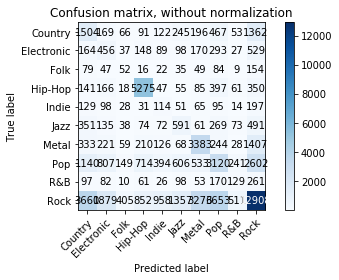

In [69]:
plot_confusion_matrix(y_test, y_predict_rf, classes=class_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.35181287 0.03953216 0.0154386  0.02128655 0.02853801 0.05730994
  0.04584795 0.10923977 0.01239766 0.31859649]
 [0.08155147 0.22675286 0.01839881 0.07359523 0.04425659 0.04873197
  0.08453506 0.14569866 0.01342616 0.26305321]
 [0.14442413 0.08592322 0.09506399 0.02925046 0.04021938 0.06398537
  0.08957952 0.1535649  0.01645338 0.28153565]
 [0.02137983 0.02517058 0.00272934 0.79984837 0.00712661 0.00833965
  0.01288855 0.06019712 0.00924943 0.05307051]
 [0.15693431 0.11922141 0.03406326 0.0377129  0.13868613 0.0620438
  0.07907543 0.11557178 0.01703163 0.23965937]
 [0.16287703 0.06264501 0.01763341 0.03433875 0.03341067 0.27424594
  0.02830626 0.12482599 0.03387471 0.22784223]
 [0.05477875 0.03635466 0.00970554 0.03454516 0.02072709 0.01118605
  0.556506   0.04013818 0.00460602 0.23145254]
 [0.11061518 0.0783039  0.0144576  0.06928003 0.03823016 0.0588007
  0.05171745 0.30273627 0.02338444 0.25247429]
 [0.09827761 0.08308004 0.01013171 0.06180344 0.026342

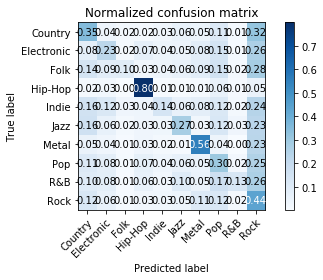

In [70]:
plot_confusion_matrix(y_test, y_predict_rf, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [71]:
rf.fit(X_train_smote,y_train_smote)
y_predrf_smote = rf.predict(X_test)


/opt/conda/envs/geopandas/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 10
building tree 2 of 10building tree 3 of 10

building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:  1.0min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.3s finished


In [72]:
print(classification_report(y_test,y_predrf_smote))

              precision    recall  f1-score   support

           0       0.20      0.37      0.26      4275
           1       0.12      0.24      0.16      2011
           2       0.06      0.10      0.07       547
           3       0.70      0.80      0.75      6595
           4       0.06      0.14      0.08       822
           5       0.20      0.29      0.24      2155
           6       0.43      0.56      0.49      6079
           7       0.36      0.31      0.34     10306
           8       0.12      0.13      0.12       987
           9       0.64      0.44      0.52     29459

    accuracy                           0.44     63236
   macro avg       0.29      0.34      0.30     63236
weighted avg       0.50      0.44      0.45     63236



In [73]:
evaluar_rendimiento_posta(rf,"asd",X_train_smote,y_train_smote)

Rendimiento de asd:	0.774 ± 0.002


#### Realizando SMOTE nos da un score menor al del dataset sin balancear clases

In [74]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

building tree 1 of 10building tree 2 of 10
building tree 3 of 10



[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    9.7s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


              precision    recall  f1-score   support

           0       0.32      0.13      0.18      4275
           1       0.41      0.10      0.16      2011
           2       0.42      0.05      0.08       547
           3       0.76      0.77      0.77      6595
           4       0.21      0.03      0.05       822
           5       0.39      0.15      0.22      2155
           6       0.56      0.41      0.47      6079
           7       0.38      0.27      0.32     10306
           8       0.51      0.07      0.12       987
           9       0.57      0.80      0.67     29459

    accuracy                           0.56     63236
   macro avg       0.45      0.28      0.30     63236
weighted avg       0.52      0.56      0.52     63236



[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.2s finished


In [73]:
print("f1_micro:{}" .format(f1_score(y_test,y_pred,average = "micro")))
print("f1_macro:{}" .format(f1_score(y_test,y_pred,average = "macro")))
print("f1_weighted:{}" .format(f1_score(y_test,y_pred,average = "weighted")))

NameError: name 'y_pred' is not defined

Normalized confusion matrix
[[1.25847953e-01 3.50877193e-03 4.67836257e-04 1.63742690e-02
  1.16959064e-03 1.21637427e-02 1.80116959e-02 8.93567251e-02
  1.40350877e-03 7.31695906e-01]
 [1.09398309e-02 1.01939334e-01 9.94530085e-04 6.46444555e-02
  2.98359025e-03 1.09398309e-02 4.32620587e-02 1.35256091e-01
  4.97265042e-04 6.28543013e-01]
 [1.09689214e-02 5.48446069e-03 4.57038391e-02 2.01096892e-02
  3.65630713e-03 1.27970750e-02 6.94698355e-02 1.17001828e-01
  0.00000000e+00 7.14808044e-01]
 [3.48749052e-03 3.63912055e-03 1.51630023e-04 7.71948446e-01
  6.06520091e-04 1.51630023e-03 5.45868082e-03 5.91357089e-02
  3.03260045e-04 1.53752843e-01]
 [2.91970803e-02 8.51581509e-03 1.21654501e-03 1.70316302e-02
  2.79805353e-02 6.08272506e-03 3.40632603e-02 1.41119221e-01
  0.00000000e+00 7.34793187e-01]
 [4.08352668e-02 7.88863109e-03 1.85614849e-03 2.32018561e-02
  2.78422274e-03 1.48955916e-01 1.25290023e-02 1.27146172e-01
  6.96055684e-03 6.27842227e-01]
 [1.06925481e-02 3.29001481e-0

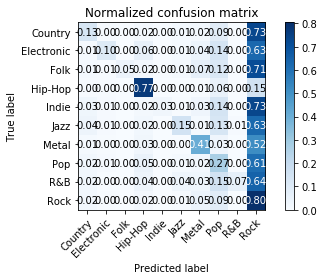

In [76]:
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

### Aplicamos PCA para ver si podemos reducir el overfit

In [77]:
from sklearn.decomposition import PCA
pca = PCA(.70)

In [78]:
#Fiteamos en train
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [79]:
#transformamos en train y test
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [80]:
rf.fit(X_train_pca,y_train)
y_pred_pca = rf.predict(X_test_pca)
print(classification_report(y_test,y_pred_pca))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 10
building tree 2 of 10building tree 3 of 10

building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    7.7s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.2s finished


              precision    recall  f1-score   support

           0       0.27      0.12      0.16      4275
           1       0.42      0.10      0.16      2011
           2       0.32      0.04      0.07       547
           3       0.75      0.76      0.75      6595
           4       0.25      0.03      0.05       822
           5       0.38      0.13      0.19      2155
           6       0.51      0.39      0.44      6079
           7       0.35      0.24      0.29     10306
           8       0.45      0.04      0.08       987
           9       0.56      0.79      0.66     29459

    accuracy                           0.54     63236
   macro avg       0.43      0.26      0.29     63236
weighted avg       0.50      0.54      0.50     63236



In [81]:
print("f1_micro:{}" .format(f1_score(y_test,y_pred_pca,average = "micro")))
print("f1_macro:{}" .format(f1_score(y_test,y_pred_pca,average = "macro")))
print("f1_weighted:{}" .format(f1_score(y_test,y_pred_pca,average = "weighted")))

f1_micro:0.5406572205705611
f1_macro:0.28627826256632505
f1_weighted:0.4989418870032385


Normalized confusion matrix
[[1.18128655e-01 3.74269006e-03 1.63742690e-03 1.61403509e-02
  9.35672515e-04 1.61403509e-02 2.17543860e-02 1.10409357e-01
  9.35672515e-04 7.10175439e-01]
 [2.08851318e-02 1.01939334e-01 2.98359025e-03 6.91198409e-02
  1.49179513e-03 6.96171059e-03 5.81800099e-02 1.20338140e-01
  9.94530085e-04 6.17105917e-01]
 [4.02193784e-02 1.82815356e-03 4.02193784e-02 1.46252285e-02
  1.82815356e-03 1.46252285e-02 6.76416819e-02 9.87202925e-02
  0.00000000e+00 7.20292505e-01]
 [5.15542077e-03 2.57771039e-03 1.51630023e-04 7.59969674e-01
  1.51630023e-04 1.21304018e-03 7.12661107e-03 5.24639879e-02
  4.54890068e-04 1.70735406e-01]
 [3.28467153e-02 7.29927007e-03 0.00000000e+00 1.33819951e-02
  2.67639903e-02 3.64963504e-03 3.16301703e-02 1.05839416e-01
  1.21654501e-03 7.77372263e-01]
 [3.99071926e-02 3.71229698e-03 1.39211137e-03 2.08816705e-02
  0.00000000e+00 1.29466357e-01 1.85614849e-02 1.44315545e-01
  3.71229698e-03 6.38051044e-01]
 [1.26665570e-02 3.94801777e-0

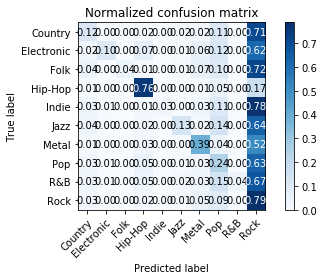

In [82]:
plot_confusion_matrix(y_test, y_pred_pca, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [83]:
rf.feature_importances_

array([0.05149982, 0.04480557, 0.06706465, 0.03924399, 0.03678284,
       0.03516355, 0.0306538 , 0.03934373, 0.03014966, 0.03149856,
       0.030833  , 0.03277441, 0.0327329 , 0.02794929, 0.03233767,
       0.03089691, 0.02907171, 0.02803263, 0.02896159, 0.02879939,
       0.02974973, 0.02826436, 0.02868773, 0.02741885, 0.03090841,
       0.02914024, 0.02901884, 0.02971528, 0.02862501, 0.02987587])

(210785, 52)

### Aplicamos RF con SMOTE y PCA

In [84]:
pca.fit(X_train_smote)

PCA(copy=True, iterated_power='auto', n_components=0.7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [85]:
#transformamos en train y test
X_train_pca_smote = pca.transform(X_train_smote)
X_test_pca_smote = pca.transform(X_test)

In [86]:
rf.fit(X_train_pca_smote,y_train_smote)


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 10
building tree 2 of 10building tree 3 of 10

building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   41.9s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=3, oob_score=False,
                       random_state=None, verbose=2, warm_start=False)

In [87]:
evaluar_rendimiento_posta(rf,"RF_smote_pca",X_train_pca_smote,y_train_smote)

Rendimiento de RF_smote_pca:	0.83 ± 0.0


In [97]:
X_test_pca.shape

(63236, 10)

In [99]:
y_pred_test_pca = rf.predict(X_test_pca_smote)


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.2s finished


In [100]:
print(classification_report(y_test,y_pred_test_pca))

              precision    recall  f1-score   support

           0       0.16      0.32      0.21      4275
           1       0.10      0.21      0.14      2011
           2       0.04      0.10      0.06       547
           3       0.69      0.78      0.73      6595
           4       0.05      0.12      0.07       822
           5       0.15      0.26      0.19      2155
           6       0.41      0.54      0.46      6079
           7       0.32      0.29      0.30     10306
           8       0.08      0.12      0.10       987
           9       0.63      0.36      0.46     29459

    accuracy                           0.39     63236
   macro avg       0.26      0.31      0.27     63236
weighted avg       0.48      0.39      0.41     63236



### El mejor score obtenido es con random forest sin aplicar PCA ni balanceo de clases.

## Viendo la matriz de confusión, Rock y Pop "confunden" muchas de las clasificaciones. Por tanto, vemos qué sucede si se dejan de lado estos géneros.

In [88]:
df_rockless = df_clean.loc[(df_clean.genre != "Rock")&(df_clean.genre!="Pop")]

In [89]:
X_rl = df_rockless.drop(columns = "genre")

In [90]:
y_rl = label_enc.transform(df_rockless["genre"])

In [91]:
#Hacemos train test split en rockless
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X_rl, y_rl, test_size=0.3, random_state=41)

In [92]:
#Estandarizamos las variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Fiteamos en train y transformamos train y test
X_train_rl = scaler.fit_transform(X_train_rl)
X_test_rl = scaler.transform(X_test_rl)

In [93]:
rf.fit(X_train_rl,y_train_rl)
y_predict_rl = rf.predict(X_test_rl)
print(classification_report(y_test_rl,y_predict_rl))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
              precision    recall  f1-score   support

           0       0.45      0.67      0.54      4258
           1       0.34      0.26      0.29      1956
           2       0.34      0.08      0.12       522
           3       0.83      0.86      0.84      6614
           4       0.19      0.08      0.11       836
           5       0.46      0.32      0.38      2196
           6       0.70      0.76      0.73      6136
           8       0.41      0.12      0.18       977

    accuracy                           0.62     23495
   macro avg       0.46      0.39      0.40     23495
weighted avg       0.60      0.62      0.60     23495



[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    3.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s finished


In [94]:
evaluar_rendimiento_posta(rf,"RF_Rockless-Pop",X_train_rl,y_train_rl)

Rendimiento de RF_Rockless-Pop:	0.602 ± 0.002


In [95]:
evaluar_rendimiento_posta(cc,"Catboost_Rockless-Pop",X_train_rl,y_train_rl)

Rendimiento de Catboost_Rockless-Pop:	0.593 ± 0.001


In [96]:
evaluar_rendimiento_posta(dt,"DT_rockless-pop",X_train_rl,y_train_rl)

Rendimiento de DT_rockless-pop:	0.517 ± 0.002


In [97]:
evaluar_rendimiento_posta(bdt,"bdt_rockless-pop",X_train_rl,y_train_rl)

Rendimiento de bdt_rockless-pop:	0.605 ± 0.001


In [65]:
print("f1_micro:{}" .format(f1_score(y_test_rl,y_predict_rl,average = "micro")))
print("f1_macro:{}" .format(f1_score(y_test_rl,y_predict_rl,average = "macro")))
print("f1_weighted:{}" .format(f1_score(y_test_rl,y_predict_rl,average = "weighted")))

f1_micro:0.61413066609917
f1_macro:0.3949701963420067
f1_weighted:0.592745857217761


In [66]:
plot_confusion_matrix(y_test_rl, y_predict_rl, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

NameError: name 'plot_confusion_matrix' is not defined

### Hacemos Gridsearch

In [192]:
from sklearn.model_selection import GridSearchCV


In [198]:
rfc = RandomForestClassifier(class_weight='balanced',bootstrap=True,n_jobs = -1,verbose = 2)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    
    "bootstrap": [True,False]
     }
    
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)


In [199]:
CV_rfc.fit(X_train_rl, y_train_rl)32135503lea

print (CV_rfc.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   30.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   31.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | e

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   30.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | 

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   56.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Par

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   55.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   55.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend wit

KeyboardInterrupt: 

### Catboost múltiple

In [40]:
cat = CatBoostClassifier(
    iterations=50,
    random_seed=43,
    loss_function='MultiClass',
    thread_count = -1

)
cat.fit(
    X_train_smote, y_train_smote,
    #cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=True,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: -2.2823215	test: -2.2830972	best: -2.2830972 (0)	total: 148ms	remaining: 7.26s
1:	learn: -2.2663652	test: -2.2677940	best: -2.2677940 (1)	total: 279ms	remaining: 6.69s
2:	learn: -2.2484008	test: -2.2510288	best: -2.2510288 (2)	total: 512ms	remaining: 8.03s
3:	learn: -2.2350095	test: -2.2387051	best: -2.2387051 (3)	total: 647ms	remaining: 7.44s
4:	learn: -2.2216472	test: -2.2267075	best: -2.2267075 (4)	total: 787ms	remaining: 7.08s
5:	learn: -2.2077197	test: -2.2135131	best: -2.2135131 (5)	total: 979ms	remaining: 7.18s
6:	learn: -2.1958363	test: -2.2024253	best: -2.2024253 (6)	total: 1.14s	remaining: 6.97s
7:	learn: -2.1852634	test: -2.1922625	best: -2.1922625 (7)	total: 1.27s	remaining: 6.69s
8:	learn: -2.1761770	test: -2.1843370	best: -2.1843370 (8)	total: 1.44s	remaining: 6.56s
9:	learn: -2.1657152	test: -2.1747998	best: -2.1747998 (9)	total: 1.6s	remaining: 6.4s
10:	learn: -2.1587255	test: -2.1682743	best: -2.1682743 (10)	total: 1.79s	remaining: 6.36s
11:	learn: -2.1504905

In [42]:
cat.best_score_

{'learn': {'MultiClass': -1.9726121514003792},
 'validation': {'MultiClass': -2.0131317195094045}}

In [43]:
cat.get_feature_importance(prettified=True)

,Feature Index,Importances
0,15,20.416422
1,0,16.927949
2,51,15.707253
3,22,8.801674
4,44,5.081747
5,46,4.659118
6,12,3.057044
7,45,2.997903
8,41,2.995819
9,33,1.627535


In [44]:
cat.classes_


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
cat.get_params()

{'iterations': 50, 'loss_function': 'MultiClass', 'random_seed': 43}

In [46]:
y_predict = cat.predict(X_test)


In [47]:
from sklearn.metrics import classification_report

In [48]:
label_enc.classes_

array(['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Pop', 'R&B', 'Rock'], dtype=object)

In [49]:
labels = ['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz',
       'Metal', 'Pop', 'R&B', 'Rock']

In [50]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

         0.0       0.39      0.14      0.20     12346
         1.0       0.13      0.08      0.10      3159
         2.0       0.02      0.02      0.02       429
         3.0       0.81      0.65      0.72      8211
         4.0       0.43      0.04      0.07      8626
         5.0       0.38      0.09      0.14      9592
         6.0       0.65      0.32      0.43     12369
         7.0       0.14      0.40      0.20      3585
         8.0       0.05      0.04      0.04      1431
         9.0       0.08      0.69      0.15      3488

    accuracy                           0.26     63236
   macro avg       0.31      0.25      0.21     63236
weighted avg       0.45      0.26      0.27     63236



### Multiclass pagina Catboost

In [39]:
#!pip install --user --upgrade catboost
#!pip install --user --upgrade ipywidgets
#!conda install -c conda-forge ipywidgets --yes
#!pip install shap
#!pip install sklearn
#!pip install --upgrade numpy
#!jupyter nbextension enable --py widgetsnbextension


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.8
  latest version: 4.7.5

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda/envs/geopandas

  added / updated specs: 
    - ipywidgets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    readline-8.0               |       hf8c457e_0         441 KB  conda-forge
    tk-8.6.9                   |    hed695b0_1002         3.2 MB  conda-forge
    libsodium-1.0.16           |    h14c3975_1001         306 KB  conda-forge
    sqlite-3.28.0              |       hcee41ef_1         1.9 MB  conda-forge
    prometheus_client-0.7.1    |             py_0          38 KB  conda-forge
    ncurses-6.1                |    hf484d3e_1002         1.3 MB  conda-forge
    testpath-0.4.2             |          py_1001          85 KB  conda-forg

readline-8.0         |  441 KB | ####################################### | 100% 
tk-8.6.9             |  3.2 MB | ####################################### | 100% 
libsodium-1.0.16     |  306 KB | ####################################### | 100% 
sqlite-3.28.0        |  1.9 MB | ####################################### | 100% 
prometheus_client-0. |   38 KB | ####################################### | 100% 
ncurses-6.1          |  1.3 MB | ####################################### | 100% 
testpath-0.4.2       |   85 KB | ####################################### | 100% 
jinja2-2.10.1        |   91 KB | ####################################### | 100% 
tornado-6.0.3        |  637 KB | ####################################### | 100% 
markupsafe-1.1.1     |   26 KB | ####################################### | 100% 
ptyprocess-0.6.0     |   15 KB | ####################################### | 100% 
_libgcc_mutex-0.1    |    3 KB | ####################################### | 100% 
jedi-0.14.0          |  703 

array([7, 7, 7, ..., 0, 0, 0])

In [38]:
y

array([7, 7, 7, ..., 0, 0, 0])

In [90]:
model = CatBoostClassifier(
    iterations=50,
    random_seed=43,
    loss_function='MultiClass',

)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [91]:
model.get_feature_importance(prettified=True)

,Feature Index,Importances
0,14,40.453281
1,year,23.177563
2,21,18.443669
3,11,6.584805
4,32,1.751563
5,20,1.113067
6,13,1.060027
7,26,0.803899
8,2,0.632160
9,12,0.543277


In [92]:
y_predict = model.predict(X_test)

In [93]:
print(classification_report(y_predict,y_test))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        1.0       0.00      0.00      0.00         0
        2.0       0.00      0.00      0.00         0
        3.0       0.71      0.71      0.71      6583
        4.0       0.00      0.00      0.00         0
        5.0       0.00      0.00      0.00         0
        6.0       0.29      0.60      0.39      2922
        7.0       0.00      0.00      0.00         0
        8.0       0.00      0.00      0.00         0
        9.0       0.94      0.52      0.67     53731

avg / total       0.89      0.54      0.66     63236



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### Asignamos un class_weight para darle a Catboost

In [123]:
from sklearn.utils import class_weight

In [124]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [125]:
class_weights

array([ 1.49462115,  3.26147215, 12.37827181,  0.95254358,  7.07329818,
        2.91598814,  1.03195552,  0.61506941,  6.35713055,  0.21471979])

In [132]:
model = CatBoostClassifier(
    iterations=100,
    random_seed=43,
    loss_function='MultiClass',
    class_weights = class_weights,
    thread_count = -1,
    

)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=True,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: -2.2805462	test: -2.2810695	best: -2.2810695 (0)	total: 1.03s	remaining: 1m 41s
1:	learn: -2.2608383	test: -2.2617692	best: -2.2617692 (1)	total: 2.15s	remaining: 1m 45s
2:	learn: -2.2434573	test: -2.2448276	best: -2.2448276 (2)	total: 3.22s	remaining: 1m 44s
3:	learn: -2.2290535	test: -2.2306332	best: -2.2306332 (3)	total: 4.38s	remaining: 1m 45s
4:	learn: -2.2156723	test: -2.2175028	best: -2.2175028 (4)	total: 5.5s	remaining: 1m 44s
5:	learn: -2.2028226	test: -2.2047840	best: -2.2047840 (5)	total: 6.72s	remaining: 1m 45s
6:	learn: -2.1914798	test: -2.1935818	best: -2.1935818 (6)	total: 7.7s	remaining: 1m 42s
7:	learn: -2.1818159	test: -2.1841436	best: -2.1841436 (7)	total: 8.69s	remaining: 1m 39s
8:	learn: -2.1716009	test: -2.1741368	best: -2.1741368 (8)	total: 9.71s	remaining: 1m 38s
9:	learn: -2.1624068	test: -2.1652039	best: -2.1652039 (9)	total: 10.7s	remaining: 1m 36s
10:	learn: -2.1541275	test: -2.1570443	best: -2.1570443 (10)	total: 11.7s	remaining: 1m 34s
11:	learn:

91:	learn: -1.8802363	test: -1.9066664	best: -1.9066664 (91)	total: 1m 36s	remaining: 8.36s
92:	learn: -1.8792694	test: -1.9058322	best: -1.9058322 (92)	total: 1m 37s	remaining: 7.31s
93:	learn: -1.8780621	test: -1.9050632	best: -1.9050632 (93)	total: 1m 38s	remaining: 6.28s
94:	learn: -1.8768301	test: -1.9040109	best: -1.9040109 (94)	total: 1m 39s	remaining: 5.23s
95:	learn: -1.8754964	test: -1.9029304	best: -1.9029304 (95)	total: 1m 40s	remaining: 4.18s
96:	learn: -1.8747119	test: -1.9022338	best: -1.9022338 (96)	total: 1m 41s	remaining: 3.13s
97:	learn: -1.8733697	test: -1.9010952	best: -1.9010952 (97)	total: 1m 42s	remaining: 2.09s
98:	learn: -1.8725779	test: -1.9004880	best: -1.9004880 (98)	total: 1m 43s	remaining: 1.04s
99:	learn: -1.8717375	test: -1.8998030	best: -1.8998030 (99)	total: 1m 44s	remaining: 0us

bestTest = -1.899802996
bestIteration = 99



In [135]:
model.get_feature_importance(prettified=True)

,Feature Index,Importances
0,year,23.280553
1,14,16.966386
2,word_count_norm,15.024168
3,21,8.545430
4,joy,4.566044
5,11,4.197317
6,32,3.287197
7,negative,3.271900
8,fear,3.214659
9,anger,2.630309


In [136]:
y_predict = model.predict(X_test)

In [137]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

         0.0       0.46      0.18      0.26     10629
         1.0       0.14      0.09      0.11      3017
         2.0       0.09      0.04      0.05      1278
         3.0       0.81      0.68      0.74      7845
         4.0       0.41      0.04      0.08      8003
         5.0       0.36      0.13      0.19      6127
         6.0       0.63      0.38      0.48     10021
         7.0       0.21      0.37      0.27      5742
         8.0       0.15      0.06      0.08      2603
         9.0       0.18      0.68      0.29      7971

    accuracy                           0.32     63236
   macro avg       0.34      0.27      0.25     63236
weighted avg       0.42      0.32      0.31     63236



In [130]:
#df2 = pd.read_csv("df_a_clasificar2.csv")

In [131]:
#df2

,index,year,artist,genre,cero,1,2,3,4,5,...,disgust,fear,joy,negative,positive,sadness,surprise,trust,year_norm,word_count_norm
0,0,2009.0,beyonce-knowles,Pop,0.003826,0.003826,0.003826,0.003826,0.003826,0.003826,...,0.033149,0.016575,0.071823,0.077348,0.116022,0.060773,0.022099,0.049724,0.854167,0.402954
1,1,2009.0,beyonce-knowles,Pop,0.026898,0.003974,0.003974,0.420449,0.003974,0.003974,...,0.018519,0.018519,0.027778,0.074074,0.037037,0.037037,0.037037,0.018519,0.854167,0.218354
2,2,2009.0,beyonce-knowles,Pop,0.003984,0.003984,0.003984,0.003984,0.003984,0.003984,...,0.013889,0.027778,0.097222,0.055556,0.208333,0.041667,0.000000,0.152778,0.854167,0.125527
3,3,2009.0,beyonce-knowles,Pop,0.005774,0.005774,0.005774,0.005774,0.005774,0.005774,...,0.000000,0.060748,0.168224,0.070093,0.378505,0.065421,0.046729,0.070093,0.854167,0.496835
4,4,2009.0,beyonce-knowles,Pop,0.154040,0.006383,0.006383,0.006383,0.175260,0.006383,...,0.000000,0.000000,0.050314,0.100629,0.150943,0.100629,0.000000,0.000000,0.854167,0.275316
5,5,2009.0,beyonce-knowles,Pop,0.005193,0.005193,0.005193,0.228589,0.005193,0.005193,...,0.017857,0.035714,0.107143,0.178571,0.142857,0.178571,0.017857,0.071429,0.854167,0.098101
6,6,2009.0,beyonce-knowles,Pop,0.004824,0.004824,0.004824,0.004824,0.004824,0.004824,...,0.008403,0.000000,0.117647,0.033613,0.168067,0.000000,0.008403,0.084034,0.854167,0.257384
7,7,2009.0,beyonce-knowles,Pop,0.008742,0.008742,0.008742,0.008742,0.008742,0.008742,...,0.000000,0.010753,0.043011,0.059140,0.043011,0.016129,0.037634,0.043011,0.854167,0.353376
8,8,2009.0,beyonce-knowles,Pop,0.005465,0.005465,0.005465,0.005465,0.005465,0.005465,...,0.008403,0.037815,0.147059,0.050420,0.180672,0.037815,0.025210,0.033613,0.854167,0.410338
9,9,2009.0,beyonce-knowles,Pop,0.004516,0.004516,0.004516,0.004516,0.004516,0.004516,...,0.052632,0.013158,0.164474,0.065789,0.184211,0.019737,0.019737,0.039474,0.854167,0.305907


In [117]:
model.save_model("catboost_model.bin")

In [123]:
causus = CatBoostClassifier()
causus.load_model("catboost_model.bin")

In [128]:
causus.get_feature_importance(prettified = True)

,Feature Index,Importances
0,year,18.432892
1,14,13.951291
2,song,7.311096
3,21,6.465589
4,11,4.487578
5,32,3.638102
6,30,2.568482
7,12,2.296104
8,cero,2.175833
9,2,2.059500


In [129]:
causus.predict(X_train)

array([[5.],
       [1.],
       [1.],
       ...,
       [4.],
       [8.],
       [5.]])